<a href="https://colab.research.google.com/github/liranpod/KNeighborsRegressor/blob/main/KNeighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import modules.

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

Reading Data.

In [234]:
admission_data = pd.read_csv("/adm_data.csv")

In [235]:
print(admission_data.head())
admission_data.info() # Shows 3 categorical & 5 numerical features
admission_data.shape # 9 columns & 400 rows

admission_data.rename(columns={'Chance of Admit ': 'Admit'}, inplace=True) # Making columns clearer
admission_data.pop("Serial No.")
admission_data.columns

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit'],
      dtype='object')

In [236]:
print(admission_data.isna().any())
print(admission_data.duplicated())

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Admit                False
dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [237]:
# Before EDA I want to cluster the score colums (GRE & TOEFL)
from sklearn.cluster import KMeans
scores = admission_data[["GRE Score", "TOEFL Score"]]
scores.head()

kmeans = KMeans(n_clusters=5)
scores["Cluster"] = kmeans.fit_predict(scores)
scores["Cluster"] = scores["Cluster"].astype("category")

scores.head()

<ipython-input-237-56ca9a246e64>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["Cluster"] = kmeans.fit_predict(scores)
<ipython-input-237-56ca9a246e64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["Cluster"] = scores["Cluster"].astype("category")


,GRE Score,TOEFL Score,Cluster
0,337,118,3
1,324,107,1
2,316,104,4
3,322,110,1
4,314,103,4


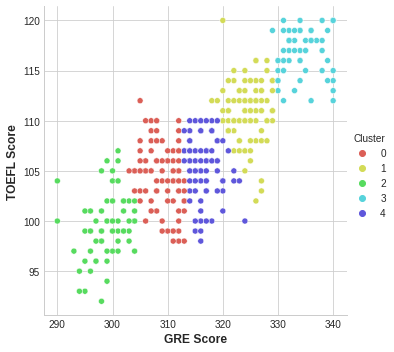

In [238]:
sns.relplot(
    x="GRE Score", y="TOEFL Score", hue="Cluster", data=scores, height=5,
)

<ipython-input-239-b07f984b6842>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["Admit"] = admission_data["Admit"]


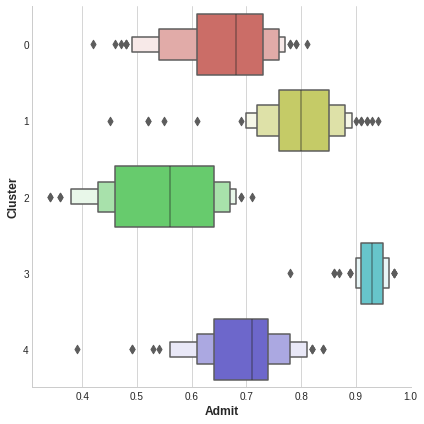

In [239]:
# Comparing to actual admission rates

scores["Admit"] = admission_data["Admit"]
sns.catplot(x="Admit", y="Cluster", data=scores, kind="boxen", height=6) 

Understanding the data.

In [240]:
for column in np.array(admission_data.columns):
  print(admission_data[column].describe())

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64
count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64
count    400.000000
mean       3.087500
std        1.143728
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64
count    400.000000
mean       3.400000
std        1.006869
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64
count    400.000000
mean       3.452500
std        0.898478
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR , dtype: float64
count    400.000000
mean       8.598925
s

GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Admit                1.000000
Name: Admit, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

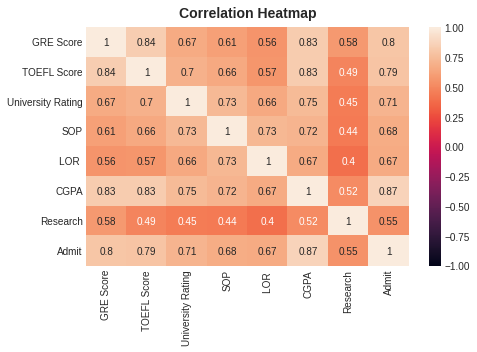

In [241]:
print(admission_data.corr()["Admit"]) # CGPA has most effect on Admission chance

plt.figure(figsize=(7,5))
sns.heatmap(admission_data.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap")


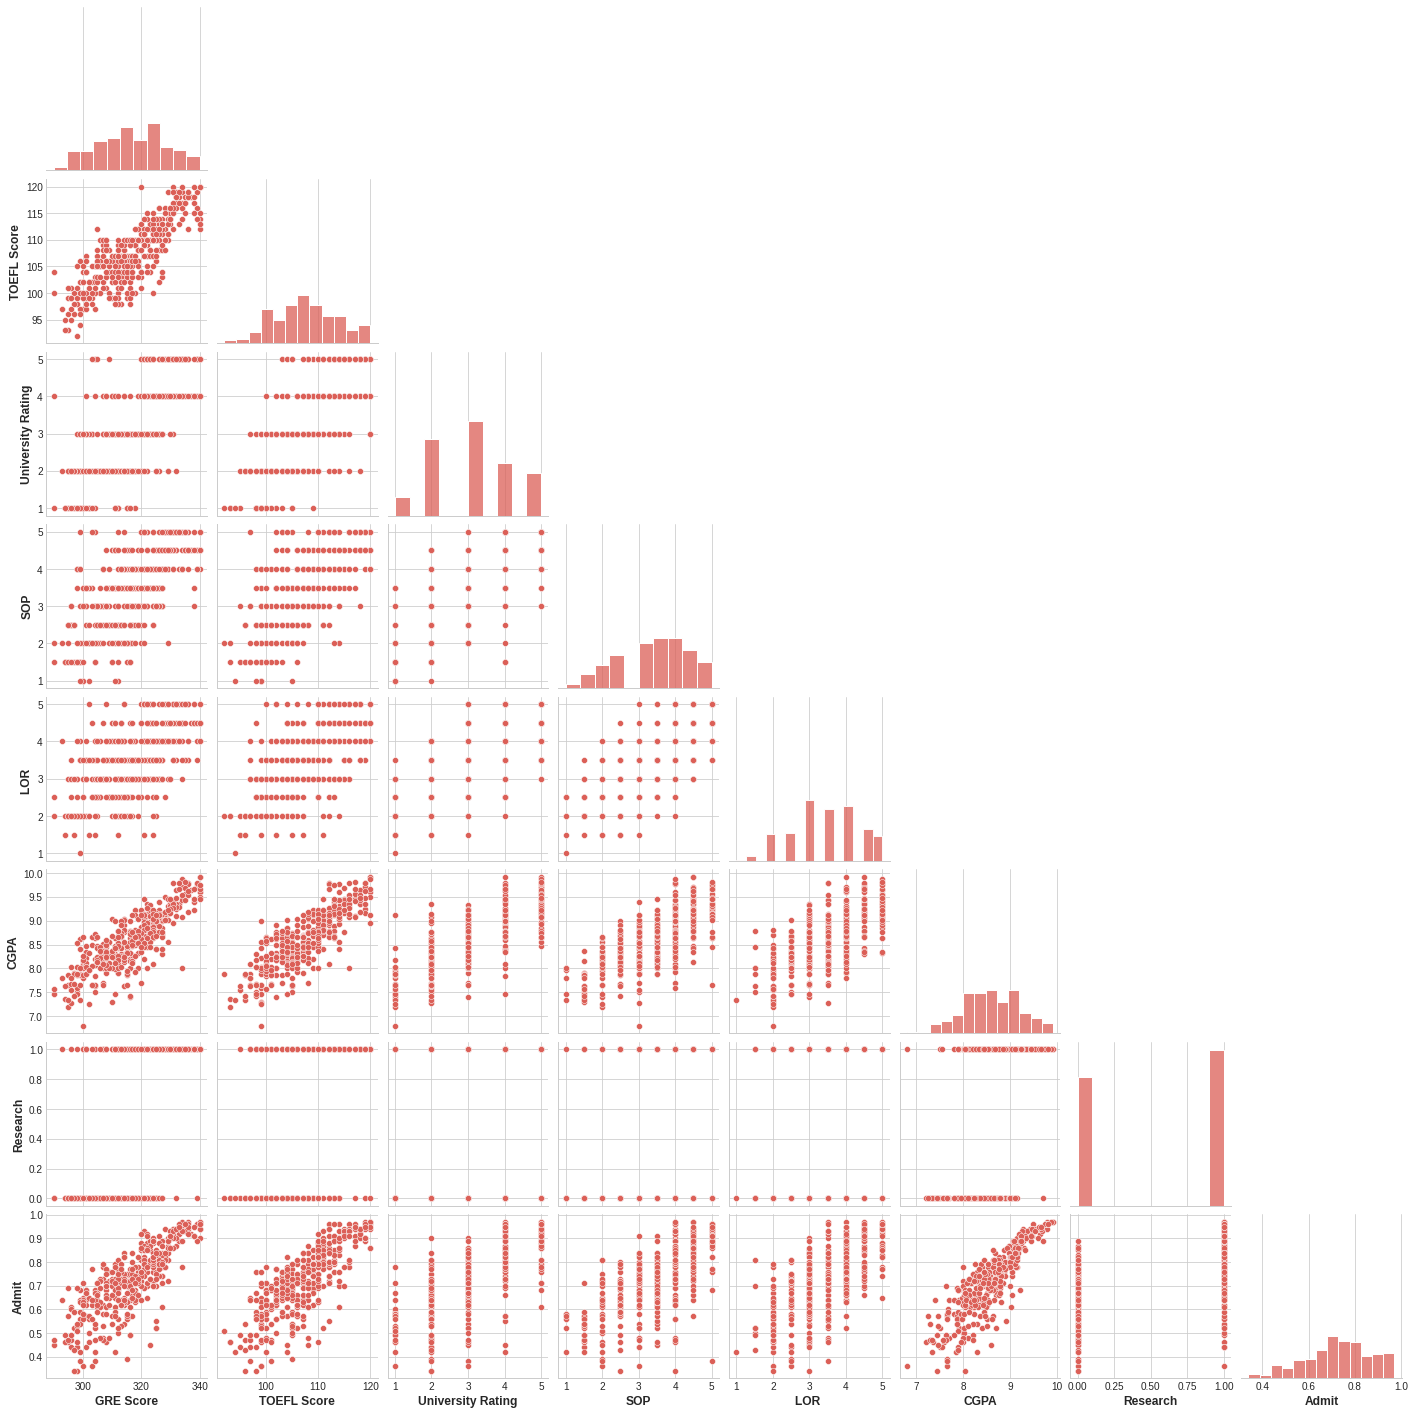

In [242]:
sns.pairplot(admission_data, corner="True")

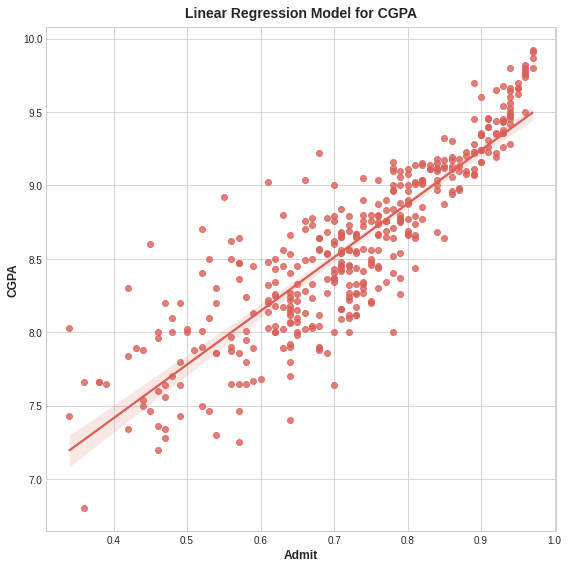

In [243]:
plt.figure(figsize=(8,8))
plt.title("Linear Regression Model for CGPA")
sns.regplot(data= admission_data, y = 'CGPA', x = 'Admit')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


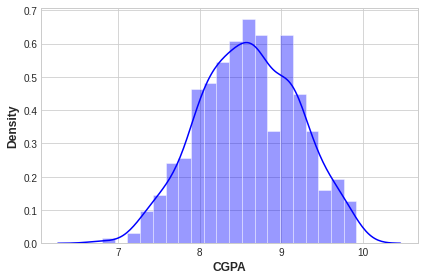

In [244]:
sns.distplot(admission_data["CGPA"], bins=20, color="blue", kde=True) 

Predicting admission chance.

In [245]:
y = admission_data.pop("Admit")
X = admission_data
print(X)
print(y)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.4, random_state=1)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396 

In [246]:
# Preprocessing
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Model 1 - Basic Linear Regression

In [247]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error as mae

lr_mae = mae(y_test, lr_pred)
print(lr_mae)

0.04521833912852975


Model 2 - KMeans Regression

In [248]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr_pred = knr.predict(X_test)

knr_mae = mae(y_test, knr_pred)
print(knr_mae)

0.05519166666666666


Model 3 - XGBoost Model

In [249]:
import xgboost

xgb = xgboost.XGBModel()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_mae = mae(y_test, xgb_pred)
print(xgb_mae)

[08:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.05263033611079057


Model 4 - LGBM Model

In [250]:
import lightgbm

lgbm = lightgbm.LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

lgbm_mae = mae(y_test, xgb_pred)
print(lgbm_mae)

# Model 3 and 4 differ in tree growth, however share the same mean absolute error

0.05263033611079057


Model 5 - Random Forest

In [251]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

rfr_mae = mae(y_test, xgb_pred)
print(rfr_mae)

0.05263033611079057


  Models       Mae
0     lr  0.045218
1    knr  0.055192
2    xgb  0.052630
3   lgbm  0.052630
4    rfr  0.052630


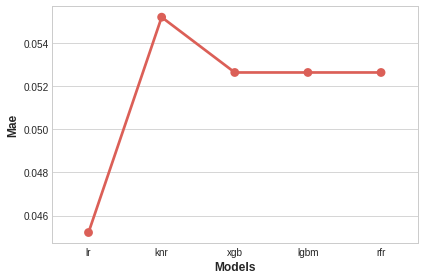

In [252]:
# Comparing models
data = {'Models': ['lr', 'knr', 'xgb', 'lgbm', 'rfr'], 'Mae': [lr_mae, knr_mae, xgb_mae, lgbm_mae, rfr_mae]}  
models_mae = pd.DataFrame(data)  

print(models_mae) 

sns.pointplot(data=models_mae, x="Models", y="Mae")

Enhancing KMeans Regressor Model.

In [253]:
knr1 = KNeighborsRegressor(n_neighbors=5, weights="uniform", algorithm="auto", leaf_size=30, p=1, metric="minkowski")
knr2 = KNeighborsRegressor(n_neighbors=10, weights="distance", algorithm="auto", leaf_size=15, p=2, metric="minkowski")
knr3 = KNeighborsRegressor(n_neighbors=25, weights=None, algorithm="kd_tree", leaf_size=10, p=1, metric="minkowski")
knr4 = KNeighborsRegressor(n_neighbors=50, weights="distance", algorithm="brute", leaf_size=50, p=2, metric="minkowski")
knr5 = KNeighborsRegressor(n_neighbors=100, weights="uniform", algorithm="ball_tree", leaf_size=75, p=1, metric="minkowski")

def compare_models(*knrs):
  knrs.fit(X_train, y_train)
  knrs_pred = knrs.predict(X_test)
  knrs_mae = mae(y_test, knr_pred)
  print(knrs_mae)

# Altering the model had no effect, each had the same score.
knr.score(X_test, y_test)

0.7005423786874598